<div>
Olá, Wail!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    
    Todos os comentarios foram revisados e o codigo foi editado
    As hipoteses foram definidas no bloco acima
</div>


<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto está muito bom e possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Uso adequado de gráficos e estatísticas descritivas
- Boas práticas de programação e organização de código
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos.
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**

</div>

# Which is game is successful?

You work for the online store Ice, which sells video games worldwide. User and expert reviews, genres, platforms (e.g., Xbox or PlayStation), and historical data on game sales are available from open sources.

The data available dates back to 2016. Let's imagine that we are in December 2016 and you are planning a campaign for 2017.

The dataset contains a "rating" column that stores the ESRB rating of each game. The Entertainment Software Rating Board evaluates the content of a game and assigns an age rating, such as Teen or Mature.

The purpose of the project is to conduct an analysis of Ice's games sales based on the data provided to identify patterns that determine whether a game is successful or not.

The goal is to determine which game generates more revenue to identify potential hits and plan advertising campaigns.

The steps are the following:

1- Organize and clean the data in order to have a clear analysis.

2- Analyze the patterns of video game sales, including the number of games sold, user and expert ratings, genres, platforms, and historical sales data.

3- Calculate and compare the total sales generated by each game across all regions.

4- Provide insights and recommendations based on the analysis to identify potential successful games and plan effective advertising campaigns for Ice.


## Inicialização

In [71]:
# Load the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

## Carregue os dados

In [72]:
# Laod Games Data
games_df = pd.read_csv("/datasets/games.csv")
print(games_df.sample(20))

                                   Name Platform  Year_of_Release  \
9973                     Lost in Shadow      Wii           2010.0   
3581        Need for Speed: Most Wanted       GC           2005.0   
16453                 Act of Aggression       PC           2015.0   
8722   Blinx 2: Masters of Time & Space       XB           2004.0   
8115                       F1 Challenge      SAT           1994.0   
8829                    We Sing UK Hits      Wii           2011.0   
4230                    Stuart Little 2      GBA           2002.0   
2154                    Gangs of London      PSP           2006.0   
15633    Ginga Fukei Densetsu: Sapphire     TG16           1995.0   
10719    Cate West: The Vanishing Files       DS           2008.0   
4              Pokemon Red/Pokemon Blue       GB           1996.0   
5006                           LocoRoco      PSP           2006.0   
9139                 Gungrave: Overdose      PS2           2004.0   
12698                    Vitamin X

In [73]:
# Print the general information about the DataFrame of the games
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


As we can see the dataframe consist of 11 columns (with 16715 data) stating the Name of the game, Platform, Year of Release, Genre, NA-EU-JP sales, Other sales, Critic Score, User score and Rating.

Each column has a data type

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente em célula separada
- O método `sample()` foi utilizado para exibir uma amostra dos dados

</div>

## Prepare the data

### Correct the data

We will explore games data and check for possible errors such as (duplicate data, missing values, data types)  and resolve this issues to ensure the data is clean and ready for analysis.

In [74]:
# convert all column names to lowercase
games_df.columns = games_df.columns.str.lower()
print(games_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os nomes das colunas foram convertidos para `lowercase` de forma automatizada.

</div>

### Check for duplicate

We can check for duplicate data and remove it to make our analysis more clear

No duplicates were found

In [75]:
games_df.duplicated()
games_df["name"][games_df["name"].duplicated()] #checking for duplicates with same name
games_df[games_df.duplicated(subset = ["name", "platform"])] #checking for duplicates with same name and platform
games_df[(games_df["name"] == "Need for Speed: Most Wanted") & (games_df["platform"] == "X360")] # double checkicng if the duplicates are totally identical

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


### Convert the data to the necessary types

In [76]:
# Drop rows with NaN values in 'year_of_release'
games_df = games_df.dropna(subset=['year_of_release'])

# Convert the 'year_of_release' column to integers
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

# user_score has an object datatype needs to be converted to float (Replace 'tbd' with NaN )
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan).astype(float)

# Display updated data types
print(games_df.dtypes)

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


year_of_release is naturally an integer value, representing a specific year. Converting it to an integer removes the unnecessary decimal point.

user_score are numerical ratings, and converting them to float allows for numerical operations and analysis. The 'tbd' (to be determined) entries were replaced with NaN to facilitate this conversion.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram estudados
- Os tipos de dados foram convertidos. Sugestão: para converter o tipo de dado do atributo `user_score`, você poderia usar `np.nan`
- Perceba que o tipo de dados do atributo `year_of_release` ainda está como `float`

</div>

### Handling the missed values:

Missing values in the year_of_release column were not filled in, as imputing a year might introduce bias or inaccuracies.

Values for user_score and critic_score could be missing if the game was not reviewed by users or critics by the time of data collection. The 'tbd' values indicate scores that were pending at the time of data collection. Null values will be kept same as any change may distort the data distribution

The ESRB rating might be missing if the game was not officially rated.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui não podemos preencher esse atributo com a média, pois isso irá distorcer a distribuição dos dados com valores fictícios. Minha sugestão é deixar como `nan`

</div>

### Calculate total sales for each game and add it as a new column

In [77]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
games_df.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13786,Unchained Blades,3DS,2011,Role-Playing,0.00,0.00,0.04,0.00,65.0,7.8,T,0.04
5272,AMF Bowling World Lanes,Wii,2008,Sports,0.33,0.00,0.00,0.03,NaN,1.1,E,0.36
1144,NFL Street 2,PS2,2004,Sports,0.79,0.62,0.00,0.21,77.0,8.7,E,1.62
540,The Sims,PS2,2003,Simulation,1.41,1.12,0.00,0.24,83.0,7.7,T,2.77
2124,Wheel of Fortune,Wii,2010,Misc,0.86,0.04,0.00,0.06,NaN,7.6,E,0.96
2370,Star Wars: The Force Unleashed,DS,2008,Action,0.50,0.28,0.00,0.09,61.0,5.5,T,0.87
16226,UEFA Champions League 2006-2007,PSP,2007,Sports,0.01,0.00,0.00,0.00,71.0,NaN,E,0.01
118,Uncharted 3: Drake's Deception,PS3,2011,Action,2.77,2.75,0.19,1.03,92.0,8.3,T,6.74
16178,Egg Mania: Eggstreme Madness,XB,2002,Puzzle,0.01,0.00,0.00,0.00,58.0,NaN,E,0.01
8809,Ice Age 2: The Meltdown,DS,2006,Platform,0.13,0.01,0.00,0.01,NaN,NaN,E,0.15


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
A receita total foi calculada e um novo atributo foi criado (`total_sales`)
</div>

## Analysis of the data

### Sales difference between platforms

See how many games were released in different years.

In [78]:
# count games per year of release and sort by year
games_per_year = games_df['year_of_release'].value_counts().sort_index()
games_per_year

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

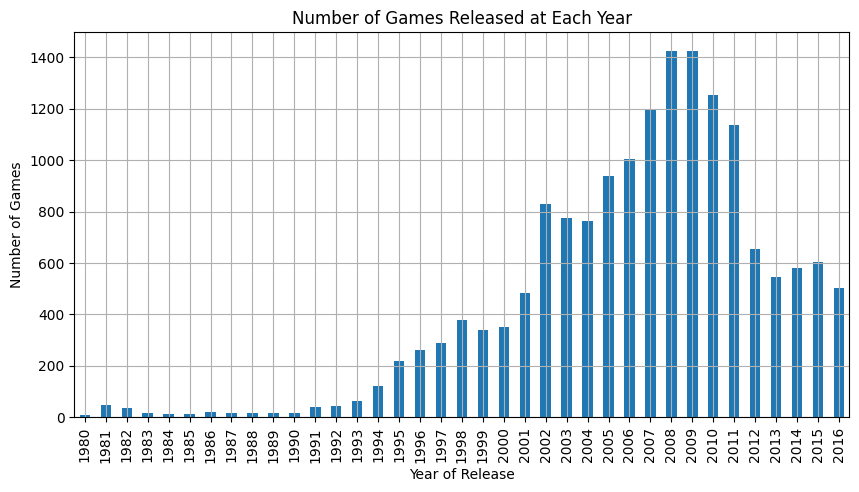

In [79]:
games_per_year.plot(kind='bar', x='year_of_release', y='total_games',
                       xlabel='Year of Release', ylabel='Number of Games',
                       title=f'Number of Games Released at Each Year', rot=90,
                       figsize=(10, 5), grid = True)
plt.show()
    

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A distribuição dos lançamentos de jogos ao longo dos anos foi analisada. Sugestão: aqui você poderia plotar um gráfico de barras com esses dados.
</div>

Evaluate the significance of the data by period

In [80]:
# consider periods with more than 100 games released as significant
significant_periods = games_per_year[games_per_year > 100]
significant_periods

1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

Choosing Platforms with the Highest Total Sales:

In [81]:
# Calculate total sales per each platform (sort from the highest to lowest)
total_sales_per_platform = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
total_sales_per_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [82]:
# choose top 5 platforms
top_platforms = total_sales_per_platform.head(5).index #to make it as list
top_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

In [83]:
# Filter data only for selected platforms
top_platforms_data = games_df[games_df['platform'].isin(top_platforms)]
top_platforms_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O total de vendas por plataforma foi analisado
- As top 5 plataformas foram selecionadas

</div>

Build Sales Distribution by Year: For each selected platform, calculates total sales per year and plots a graph.

In [84]:
# total sales per year for each selected platform
platform_sales_per_year = top_platforms_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
print(platform_sales_per_year)

   platform  year_of_release  total_sales
0        DS             1985         0.02
1        DS             2004        17.27
2        DS             2005       130.14
3        DS             2006       119.81
4        DS             2007       146.94
5        DS             2008       145.31
6        DS             2009       119.54
7        DS             2010        85.02
8        DS             2011        26.18
9        DS             2012        11.01
10       DS             2013         1.54
11      PS2             2000        39.17
12      PS2             2001       166.43
13      PS2             2002       205.38
14      PS2             2003       184.31
15      PS2             2004       211.81
16      PS2             2005       160.66
17      PS2             2006       103.42
18      PS2             2007        75.99
19      PS2             2008        53.90
20      PS2             2009        26.40
21      PS2             2010         5.64
22      PS2             2011      

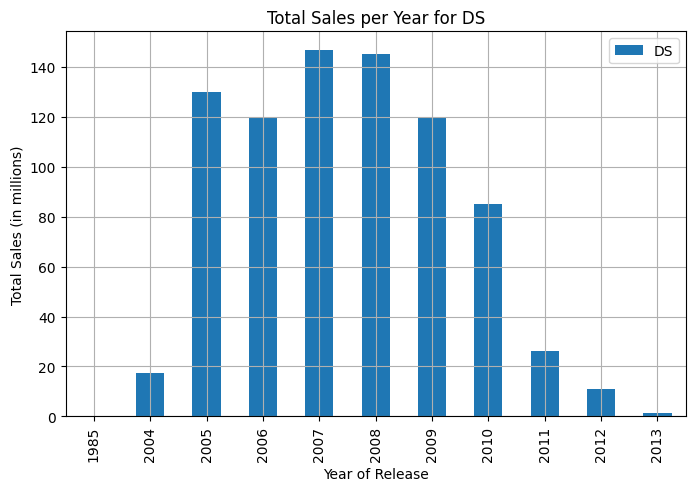

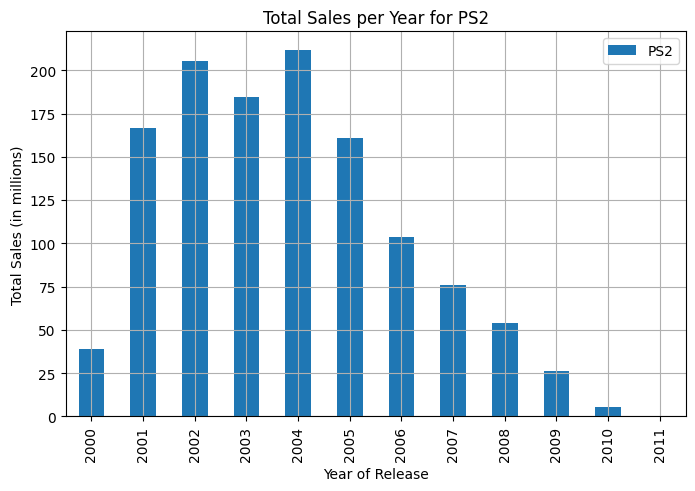

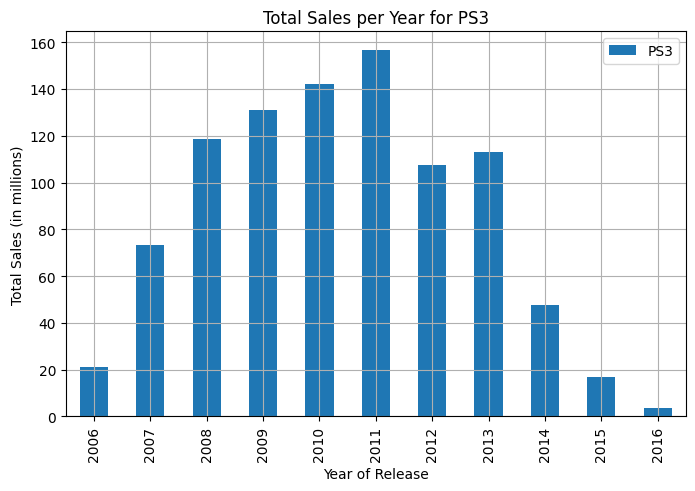

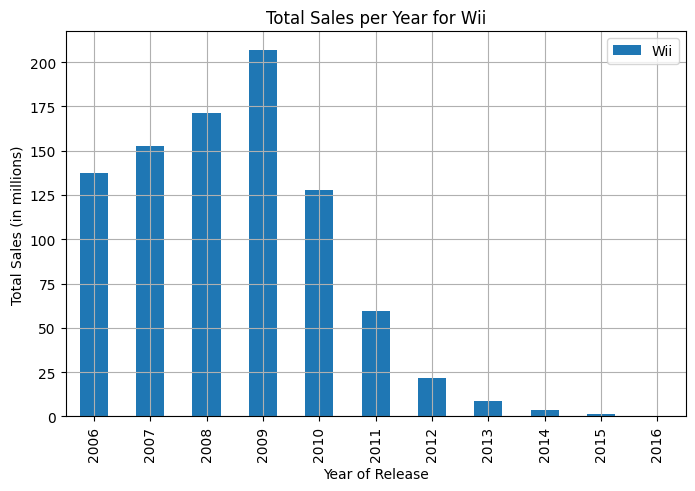

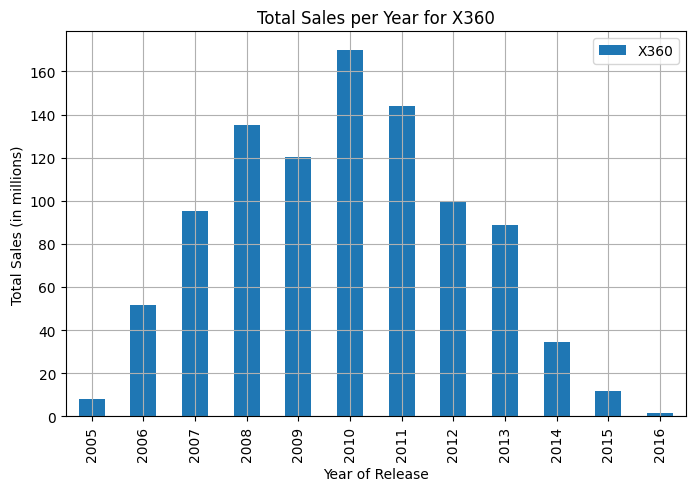

In [85]:
# Function to plot sales per year for top 5 platforms
def plot_sales_per_year(platform_sales_per_year, platform_name):
    platform_data = platform_sales_per_year[platform_sales_per_year['platform'] == platform_name]
    platform_data.plot(kind='bar', x='year_of_release', y='total_sales',
                       xlabel='Year of Release', ylabel='Total Sales (in millions)',
                       title=f'Total Sales per Year for {platform_name}', rot=90,
                       figsize=(8, 5), grid=True, label=platform_name)
    plt.show()
    
plot_sales_per_year(platform_sales_per_year, 'DS')
plot_sales_per_year(platform_sales_per_year, 'PS2')
plot_sales_per_year(platform_sales_per_year, 'PS3')
plot_sales_per_year(platform_sales_per_year, 'Wii')
plot_sales_per_year(platform_sales_per_year, 'X360')

Looking at the distribution we can find that the peak of sales of the platform occurs after 4 year of its lauch

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As vendas para as top plataformas foram analisadas. Sugestão: considere criar uma função para evitar repetição de código

</div>

Identify Platforms With No Current Sales

In [86]:
# Finds platforms that have approximately zero sales currently

old_popular_platforms = total_sales_per_platform[total_sales_per_platform < 1]
old_popular_platforms

platform
TG16    0.16
3DO     0.10
GG      0.04
PCFX    0.03
Name: total_sales, dtype: float64

Determine Platform Lifecycle: Computes the first and last year of sales for each platform and calculates the lifecycle in years.

In [87]:
# Determine the lifecycle of platforms (in years)
platform_lifecycle = games_df.groupby('platform')['year_of_release'].agg(['min', 'max']) #get the first and last year of sales
platform_lifecycle

#subtract the first and last year so that we get the lifecycle of each platform
platform_lifecycle['lifecycle'] = platform_lifecycle['max'] - platform_lifecycle['min']
print(platform_lifecycle['lifecycle'].sort_values(ascending=False))

platform
PC      31
DS      28
GB      13
X360    11
PSP     11
PS2     11
NES     11
DC      10
Wii     10
PS3     10
2600     9
SNES     9
PS       9
XB       8
GBA      7
GC       6
N64      6
3DS      5
PSV      5
SAT      5
WiiU     4
GEN      4
NG       3
XOne     3
PS4      3
WS       2
3DO      1
SCD      1
TG16     0
PCFX     0
GG       0
Name: lifecycle, dtype: int64


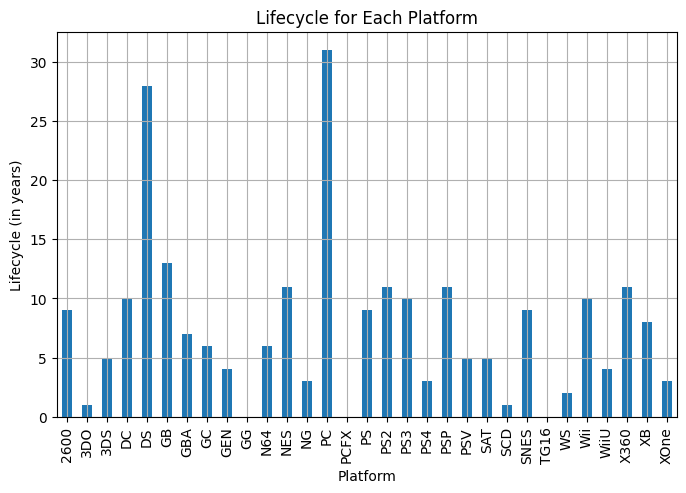

In [88]:
platform_lifecycle["lifecycle"].plot(kind='bar', xlabel='Platform', ylabel='Lifecycle (in years)',
                       title=f'Lifecycle for Each Platform', rot=90,
                       figsize=(8, 5), grid=True,)
plt.show()

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O ciclo de vida das plataformas foi analisado corretamente. Como sugestão: aqui você poderia plotar a distribuição desses dados também através de gráficos de barras ou boxplots

</div>

### Indentify the most lucrative platforms

To build a model for predicting game sales in 2017, it's crucial to choose an appropriate period for data analysis.

Based on previous questions and analyses, here are some considerations:

1- The available data extends up to the year 2016. Therefore, to construct a predictive model for 2017, we should use historical data up to the most recent year available, which is 2016.

2- Analyzing sales over the years helps capture historical trends and seasonal patterns that may influence future sales.

3- Using a more recent period (such as the past 5 years) can be more relevant as it better reflects current market conditions in the gaming industry.

Thus, the ideal period to gather data would be from 2013 to 2016

In [91]:
# Filter the data for the years 2011 to 2016
filtered_games = games_df[(games_df['year_of_release'] >= 2013) & (games_df['year_of_release'] <= 2016)]

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui precisamos de pequenos ajustes no filtro do atributo `year_of_release`. Dicas:
    
- Plote a distribuição dos dados para fazer esse filtro. Veja no gráfico histórico o período de maior concentração de dados
- Além disso, o período selecionado deve ser no máximo até 5 anos e até 2017 (ou seja, <=2017)
- O período selecionado não pode ser menor do que 3 anos
- Sugestão: filtro os dados a partir de `2013`.

</div>

In [92]:
# Calculate total sales per platform for the filtered period
total_sales_per_platform = filtered_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
total_sales_per_platform

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

In [93]:
# Choose platforms with the highest total sales in the filtered period
top10_platforms = total_sales_per_platform.head(10).index  #top 10 platforms for analysis
top10_platforms

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'], dtype='object', name='platform')

In [94]:
# Filter data only for the chosen platforms
top10_platforms_data = filtered_games[filtered_games['platform'].isin(top10_platforms)].reset_index()
top10_platforms_data

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2221,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2222,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2223,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [95]:
# Calculate total sales per year for each selected platform
sales_per_year_platform = top10_platforms_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
sales_per_year_platform

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,PC,2013,12.38
5,PC,2014,13.28
6,PC,2015,8.52
7,PC,2016,5.25
8,PS3,2013,113.25
9,PS3,2014,47.76


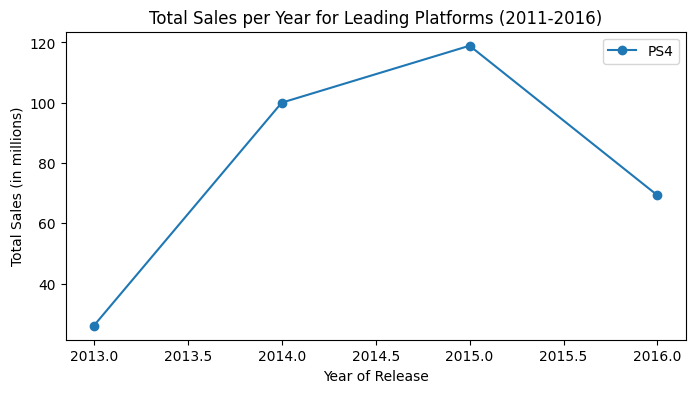

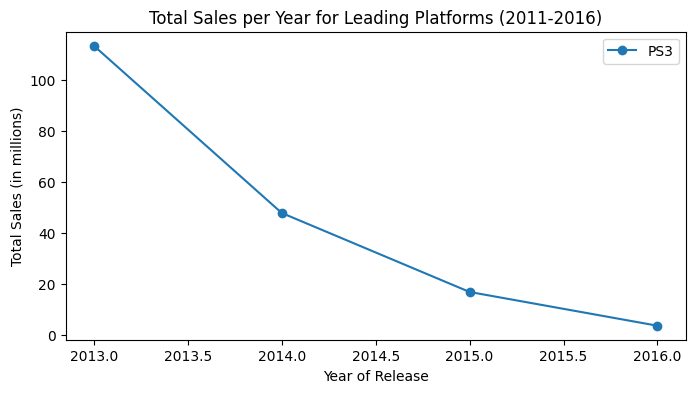

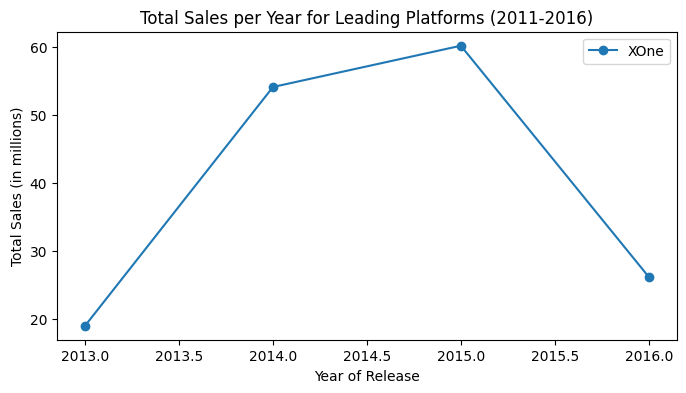

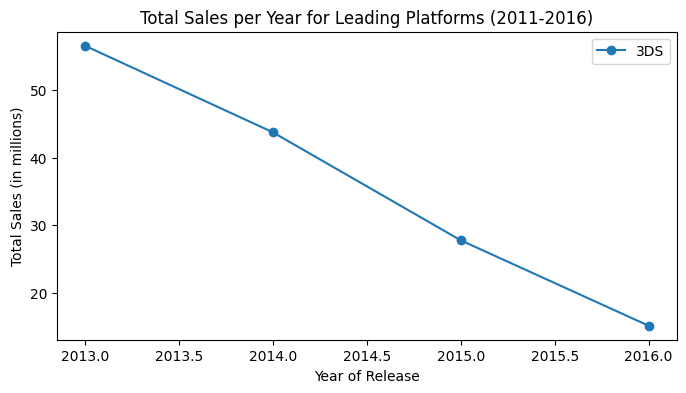

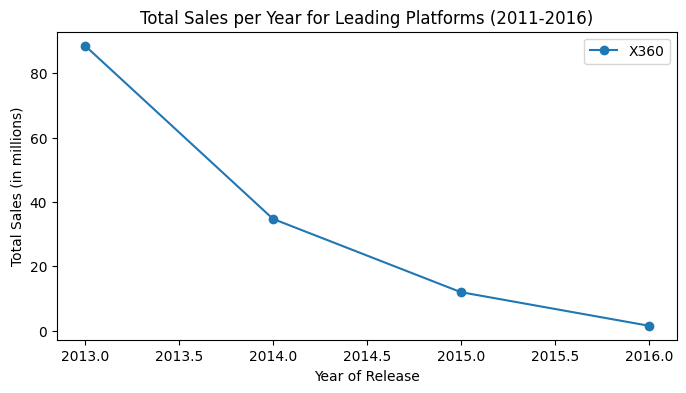

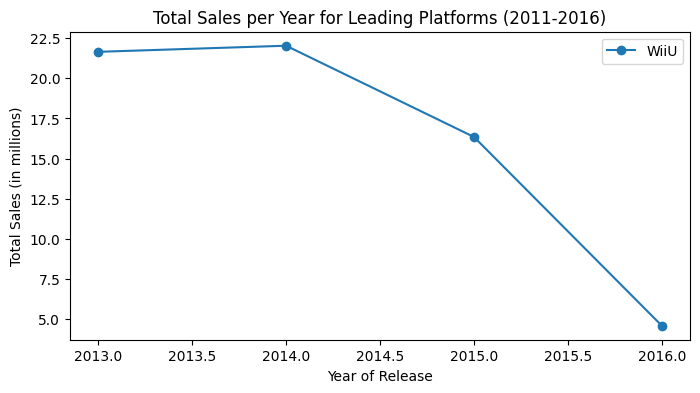

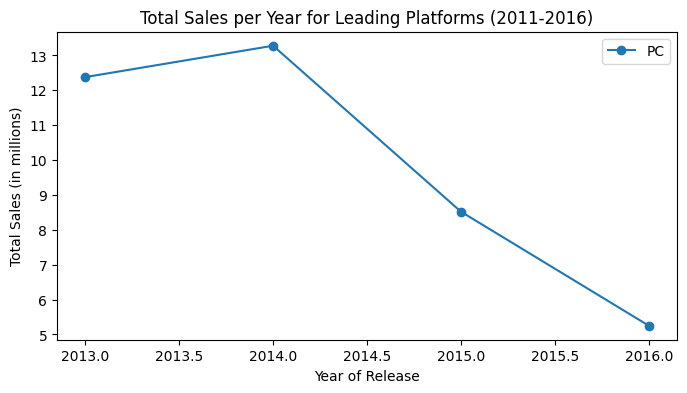

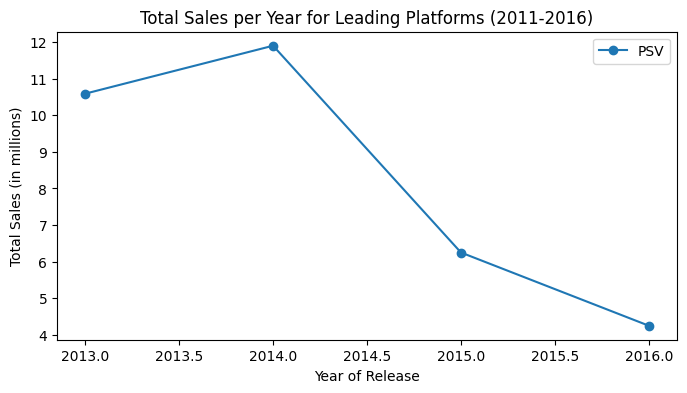

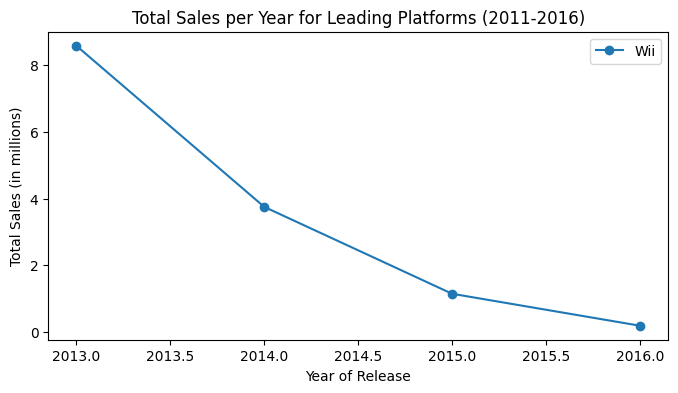

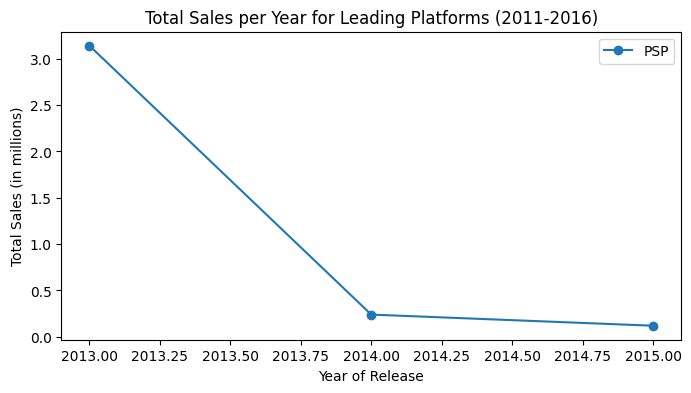

In [96]:
# Plot distribution graph
for platform in top10_platforms: #create graph for all the platforms instead of one by one
    platform_sales = sales_per_year_platform[sales_per_year_platform['platform'] == platform]
    platform_sales.plot(x = 'year_of_release', y = 'total_sales', xlabel = 'Year of Release', ylabel = 'Total Sales (in millions)',
                        title = 'Total Sales per Year for Leading Platforms (2011-2016)',
                        figsize=(8, 4), marker='o', label=platform)
plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Vamos revisar essa análise após o ajuste no filtro de período.

</div>

In [97]:
# Function to calculate growth rate
def calculate_growth_rate(df):
    
    # Get total sales at the start and end of the period
    start_sales = df['total_sales'].iloc[0]
    end_sales = df['total_sales'].iloc[-1]
    
    # Compute the growth rate, ensuring no division by zero
    growth_rate = (end_sales - start_sales) / start_sales
    
    return growth_rate

# Apply the function to calculate growth rate for each platform (Rename the column from 0 to 'growth_rate' for clarity)
growth_rates = sales_per_year_platform.groupby('platform').apply(calculate_growth_rate).reset_index().rename(columns={0: 'growth_rate'})
growth_rates

,platform,growth_rate
0,3DS,-0.732367
1,PC,-0.575929
2,PS3,-0.968212
3,PS4,1.664486
4,PSP,-0.961783
5,PSV,-0.598678
6,Wii,-0.979045
7,WiiU,-0.787529
8,X360,-0.982840
9,XOne,0.379219


In [98]:
# Identify potentially lucrative platforms based on sales and growth rates
potentially_lucrative_platforms = growth_rates[growth_rates['growth_rate'] > 0]
potentially_lucrative_platforms

,platform,growth_rate
3,PS4,1.664486
9,XOne,0.379219


Looking at the data above we find that the PS4 and XOne are the only platforms showing positive growth, with the PS4 growing more significantly. These platforms are likely the most lucrative for future investments and marketing campaigns.

Other platforms (3DS, DS, PC, PS3, PSV, Wii, WiiU, X360) show negative growth rates, indicating declining sales. These platforms are becoming less popular and may not be worth significant investment for future campaigns. The high negative growth rates for the PS3, Wii, and X360 suggest these platforms are near the end of their life cycles and are being replaced by newer platforms like the PS4 and Xbox One.

These insights can help ICE focus its marketing and sales strategies on the most promising platforms, particularly the PS4 and Xbox One, while considering the declining trends of other platforms.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A taxa de crescimento por plataforma foi analisada!

</div>

### Create the Box Plot

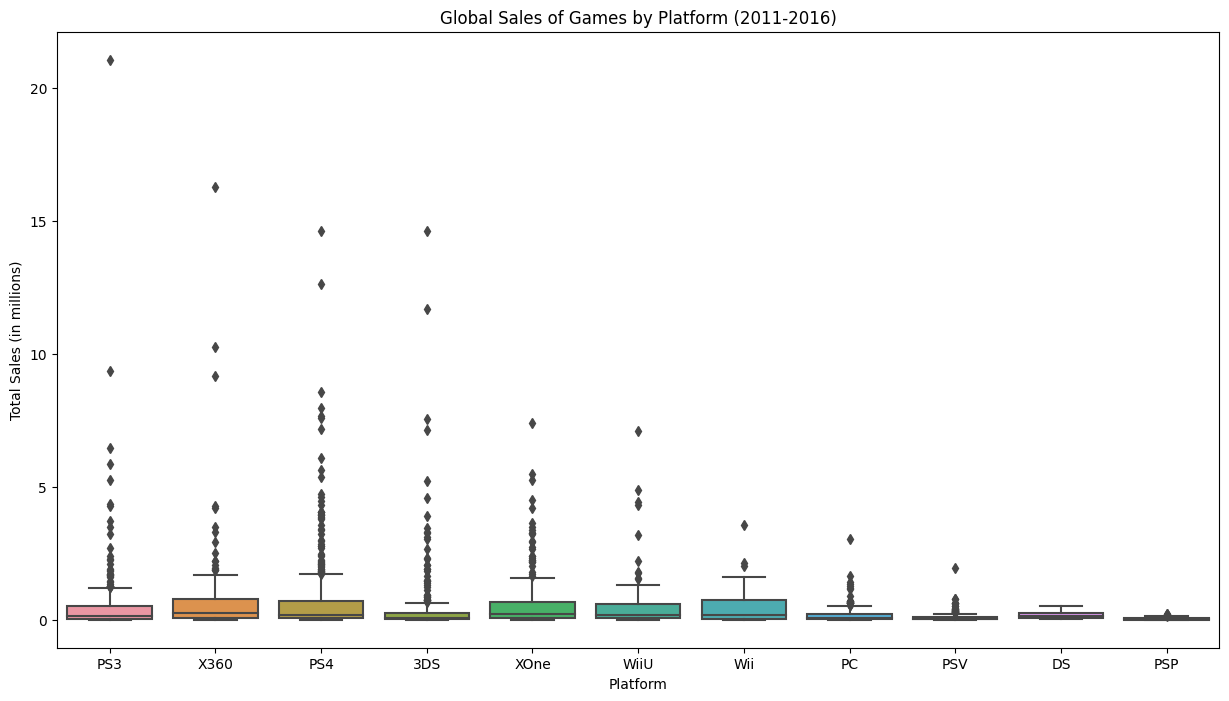

In [99]:
# Create the box plot for global sales divided by platform

plt.figure(figsize=(15, 8)) #graph size

sns.boxplot(x = 'platform', y = 'total_sales', data = filtered_games)
plt.title('Global Sales of Games by Platform (2011-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')

plt.show()

We wiil observe the median, IQR, and outliers to determine platform performance and variability in sales

PS4 and XOne both show relatively high median sales compared to other platforms, indicating a robust performance in this period. 3DS, PS3, X360 also have moderate median sales, but not as high as PS4 and XOne.

Wii, DS, and PC have a narrower IQR, indicating more consistent sales performance. PS4, XOne, PS3, X360 show a wider IQR, suggesting a greater variability in sales.

PS4, XOne, 3DS have several high outliers, indicating some games have performed exceptionally well. Older Platforms such as Wii, DS, PS3, X360 also show high outliers but less frequent than the newer platforms like PS4 and XOne.

PS4 and XOne stand out as the platforms with the highest median sales and several high outliers, indicating strong and potentially lucrative platforms.

Wii and DS show more consistent but lower sales, suggesting they are stable but not growing.

PS3 and X360, while having some high outliers, show generally lower and more variable sales, indicating they are likely declining.

Based on these observations, ICE should focus on investing and marketing for PS4 and XOne. These platforms show the highest growth and potential. In addition, it should monitor platforms like 3DS while still having some high-performing games, it might be declining slowly. Moreover, avoiding heavy investment in older platforms like PS3, X360, Wii, and DS which show significant decline and may not be worth further investment.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A distribuição das vendas foi analisada por plataforma usando um gráfico de caixas (boxplot)

</div>

### Correlation between ratings and sales

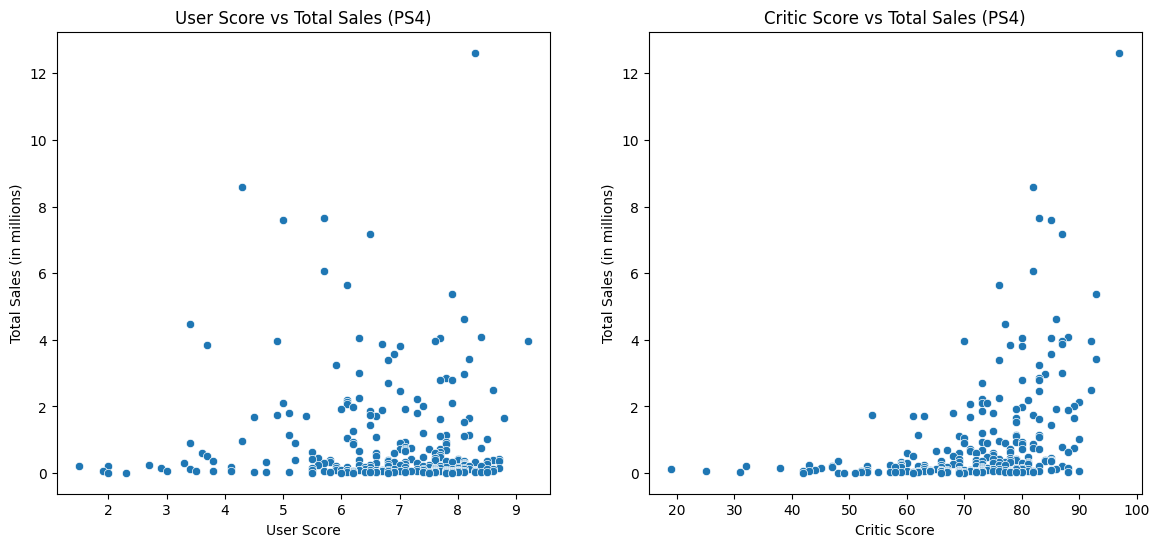

In [100]:
# Use data of PS4 platform
ps4_games = filtered_games[filtered_games['platform'] == 'PS4']


# Create scatter plots for user and critic scores against total sales (graphs beside each other)
plt.figure(figsize=(14, 6)) #graph size

# User Score vs Total Sales
plt.subplot(1, 2, 1)
sns.scatterplot(data = ps4_games, x = 'user_score', y = 'total_sales')
plt.title('User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Critic Score vs Total Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data = ps4_games, x = 'critic_score', y = 'total_sales')
plt.title('Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.show()

In [101]:
# Calculate correlation coefficients
ps4_user_score_corr = ps4_games['user_score'].corr(ps4_games['total_sales'])
ps4_critic_score_corr = ps4_games['critic_score'].corr(ps4_games['total_sales'])
print('Correlation between User Score and Total Sales: ', ps4_user_score_corr)
print('Correlation between Critic Score and Total Sales: ', ps4_critic_score_corr)

Correlation between User Score and Total Sales:  -0.031957110204556424
Correlation between Critic Score and Total Sales:  0.40656790206178095


From the data above we can conclude that the weak correlation (-0.0319) and the scattered plot (no clear pattern) indicate that user reviews do not significantly influence the sales of PS4 games. This could mean that factors other than user ratings play a more critical role in driving sales.

The moderate correlation (0.406) and the slight upward trend in the scatter plot indicate that higher critic scores are usually linked to higher sales, but the impact isn't very strong. This suggests that while good reviews from critics help, they aren't the only factor that determines a game's commercial success.

For game developers and marketers, focusing solely on improving user scores might not be the most effective strategy to boost sales. However, achieving higher critic scores might have a more noticeable impact on sales, although it should be part of a broader strategy that includes other factors like marketing and brand strength.

Compare the impacts with the sales of other platforms (PS3, XOne, X360)

In [102]:
# Use data of PS3 platform
ps3_games = filtered_games[filtered_games['platform'] == 'PS3']

# Calculate correlation coefficients
ps3_user_score_corr = ps3_games['user_score'].corr(ps3_games['total_sales'])
ps3_critic_score_corr = ps3_games['critic_score'].corr(ps3_games['total_sales'])
print('Correlation between User Score and Total Sales: ', ps3_user_score_corr)
print('Correlation between Critic Score and Total Sales: ', ps3_critic_score_corr)

Correlation between User Score and Total Sales:  0.0023944027357566925
Correlation between Critic Score and Total Sales:  0.3342853393371919


In [103]:
# Use data of XOne platform
xone_games = filtered_games[filtered_games['platform'] == 'XOne']

# Calculate correlation coefficients
xone_user_score_corr = xone_games['user_score'].corr(xone_games['total_sales'])
xone_critic_score_corr = xone_games['critic_score'].corr(xone_games['total_sales'])
print('Correlation between User Score and Total Sales: ', xone_user_score_corr)
print('Correlation between Critic Score and Total Sales: ', xone_critic_score_corr)

Correlation between User Score and Total Sales:  -0.06892505328279414
Correlation between Critic Score and Total Sales:  0.4169983280084017


In [104]:
# Use data of X360 platform
x360_games = filtered_games[filtered_games['platform'] == 'X360']

# Calculate correlation coefficients
x360_user_score_corr = x360_games['user_score'].corr(x360_games['total_sales'])
x360_critic_score_corr = x360_games['critic_score'].corr(x360_games['total_sales'])
print('Correlation between User Score and Total Sales: ', x360_user_score_corr)
print('Correlation between Critic Score and Total Sales: ', x360_critic_score_corr)

Correlation between User Score and Total Sales:  -0.011742185147181342
Correlation between Critic Score and Total Sales:  0.3503445460228664


As we can see, the correlation between user scores and sales, as well as between critic scores and sales on other platforms (PS3, XOne, X360), is almost as the same impact as of the PS4.

This means that critic scores have a moderate and positive influence on game sales across all analyzed platforms, while user scores show a very weak influence.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Vamos revisar essa análise após o ajuste no preenchimento dos valores ausentes dos atributos de `score`

</div>

## Create a user profile for each region (2013-2016)

### Top 5 Platforms

#### North America Region

In [126]:
# Get data of top 5 platforms in NA Region
na_region_platforms = filtered_games.groupby('platform')['na_sales'].sum().sort_values(ascending =False).head(5).reset_index()
na_region_platforms

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


#### Europe Region

In [127]:
# Get data of top 5 platforms in EU Region
eu_region_platforms = filtered_games.groupby('platform')['eu_sales'].sum().sort_values(ascending =False).head(5).reset_index()
eu_region_platforms

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


#### Japan Region

In [128]:
# Get data of top 5 platforms in JP Region
jp_region_platforms = filtered_games.groupby('platform')['jp_sales'].sum().sort_values(ascending =False).head(5).reset_index()
jp_region_platforms

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


As we can conclude form the data:

PS4 leads over all platforms in NA region and in EU region. EU region PS3 leads in sales against XOne and X360.

However in JP region, 3DS leads over other platforms with much sales compared to other regions. In addtion, PS4 is present but with significantly lower sales in Japan while X360 is not popular.

Regarding Xbox One, it ranks 2nd with considerable sales in NA region leading over X360 and PS3. Although, in EU region Xbox One ranks 3rd passed by PS3, while it is not among the top-selling in JP region.

For Nintendo 3DS, it ranks fifth with significant sales in NA region, as well as in EU region (ranked fifth) but with lower sales compared to North America. However, it dominates in Japan, indicating high popularity locally.

PC platform is not anymore popular in Europe and North America.

PSV and WiiU are more popular in Japan than in other regions, showing a preference for handheld consoles in the Japanese market.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O perfil de usuário foi criado por região. Sugestão: aqui você poderia calcular outras estatísticas descritivas como **desvio padrão** de vendas por região
- As conclusões foram apresentadas
</div>

### Top 5 Genres

#### North America Region

In [129]:
# Get data of top 5 genres in NA Region
na_region_genres = filtered_games.groupby('genre')['na_sales'].sum().sort_values(ascending =False).head(5).reset_index()
na_region_genres

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


#### Europe Region

In [130]:
# Get data of top 5 genres in EU Region
eu_region_genres = filtered_games.groupby('genre')['eu_sales'].sum().sort_values(ascending =False).head(5).reset_index()
eu_region_genres

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


#### Japan Region

In [131]:
# Get data of top 5 genres in JP Region
jp_region_genres = filtered_games.groupby('genre')['jp_sales'].sum().sort_values(ascending =False).head(5).reset_index()
jp_region_genres

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


As we can see:

Action games are the most popular genre, with the highest sales in NA and EU region but with slightly lower sales in Europe compared to North America. In Japan, action games are ranked 2nd.

Shooter games are ranked 2nd, Sports games are ranked 3rd, Role-Playing games are ranked 4th in both NA and EU region with lower sales in Europe compared to North America. However, Shooter games and Sport games are not popular in Japan, while Role-Playing games are the most popular genre there.

Miscellaneous games are ranked 5th in NA, while it is not popular in EU. Although, Racing games make it into the top five in EU region, while it is not popular in NA region.

Miscellaneous, Fighting, and Platform games are popular, indicating a diverse range of interests in Japan.

### ESRB impact on sales

#### North America Region

In [132]:
# Get data according to ESRB in NA Region
na_region_rating = filtered_games.groupby('rating')['na_sales'].sum().sort_values(ascending =False).reset_index()
na_region_rating

,rating,na_sales
0,M,165.21
1,E,79.05
2,E10+,54.24
3,T,49.79


#### Europe Region

In [133]:
# Get data according to ESRB in EU Region
eu_region_rating = filtered_games.groupby('rating')['eu_sales'].sum().sort_values(ascending =False).reset_index()
eu_region_rating

,rating,eu_sales
0,M,145.32
1,E,83.36
2,E10+,42.69
3,T,41.95


#### Japan Region

In [134]:
# Get data according to ESRB in JP Region
jp_region_rating = filtered_games.groupby('rating')['jp_sales'].sum().sort_values(ascending =False).reset_index()
jp_region_rating

,rating,jp_sales
0,T,20.59
1,E,15.14
2,M,14.11
3,E10+,5.89


Analyzing the data resulted we cand find th following:

Mature "M" rated games lead in sales in both NA and EU region indicating a strong preference for mature content in these regions. However, these games are less popular in JP compared to NA and EU (ranking 3rd)

Everyone "E" rated games are the 2nd most popular, showing strong sales in NA and EU region. In JP, "E" rated games are also the second most popular, but with low sale compared to North America and Europe.

Everyone 10+ "E10+" are ranked 3rd in NA and EU, while in JP it have the lowest sales among the top four ratings, indicating a lesser impact compared to other regions.

Teen "T"rated games rank 4th in NA and EU, while it dominates the sale in JP, reflecting a higher preference for content suitable for teens in Japan.

Sales for Early Childhood "EC" and Rating Pending "RP" rated games are negligible or non-existent in all regions

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A análise dos principais jogos por categoria foi analisada por região
- As conclusões foram apresentadas
</div>

## Statistical Hypothesis Test

### Test Hypothesis that the average user score for the Xbox One and PC platforms are the same.

To test the hypothesis that the the average user score for the Xbox One and PC platforms are the same, we can formulate the following null and alternative hypotheses:

Null Hypothesis (H0): The average user score for the Xbox One and PC platforms are equal

Alternative Hypothesis (H1): There is a difference in the average user score for the Xbox One and PC platforms.

As we have two platforms with different user score, we will perform a two-sample independent t-test with a significance level (alpha value) equals to 0.05 (5%) be compared with.

In [135]:
# Filter data for users score of Xbox One and PC platform
xone_user_score = filtered_games['user_score'][filtered_games['platform'] == 'XOne']
print(xone_user_score)
print()
print()
pc_user_score = filtered_games['user_score'][filtered_games['platform'] =='PC']
print(pc_user_score)

99       NaN
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    NaN
16660    6.7
16672    NaN
Name: user_score, Length: 247, dtype: float64


458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16509    7.9
16518    1.4
16617    NaN
16631    NaN
16692    7.6
Name: user_score, Length: 189, dtype: float64


In [136]:
# Check Average and Variance of the users score of XOne and PC platforms

mean_xone_user_score = np.mean(xone_user_score) #average user score for XOne platform
var_xone_use_score = np.var(xone_user_score) #variance user score for XOne platform

print("Average User Score for Xbox One: ", mean_xone_user_score)
print("Variance User Score for Xbox One: ", var_xone_use_score)

mean_pc_user_score = np.mean(pc_user_score) #average user score for PC platform
var_pc_use_score = np.var(pc_user_score) #variance user score for PC platform

print("Average User Score for PC: ", mean_pc_user_score)
print("Variance User Score for PC: ", var_pc_use_score)

Average User Score for Xbox One:  6.521428571428572
Variance User Score for Xbox One:  1.8965188383045526
Average User Score for PC:  6.269677419354839
Variance User Score for PC:  3.01630634755463


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você precisa definir as hipóteses nula e alternativa **antes** da execução do teste.

</div>

In [137]:
# Hypothesis test

alpha = 0.05

#test hypothesis that the average user score for both platforms are equal
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)

print('p-value:', results.pvalue) #print p-value

if (results.pvalue < alpha): # compare p-value with the significance level alpha
    print("Reject Null Hypothesis")
else:
    print("Cannot reject the Null Hypothesis")

p-value: nan
Cannot reject the Null Hypothesis


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Vamos revisar essa análise após o ajuste no preenchimento dos valores ausentes dos atributos de `score`

</div>

After doing the test it has been confirmed that the average user score for the Xbox One and PC platforms are the same (Xbox One 6.52, PC 6.28) 

### Test Hypothesis that the average user score for the Action and Sports genres are different.

To test the hypothesis that the the average user score for the  Action and Sports genres are different, we can formulate the following null and alternative hypotheses:

Null Hypothesis (H0): The average user score for Action and Sports genres are different.

Alternative Hypothesis (H1): There is no difference in the average user score for Action and Sports genres.

As we have two genres with different user score, we will perform a two-sample independent t-test with a significance level (alpha value) equals to 0.05 (5%) be compared with.

In [138]:
# Filter data for users score of Action and Sports genres.
action_user_score = filtered_games['user_score'][filtered_games['genre'] == 'Action']
print(action_user_score)
print()
print()
sports_user_score = filtered_games['user_score'][filtered_games['genre'] =='Sports']
print(sports_user_score)

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16680    NaN
16691    NaN
16692    7.6
16699    NaN
16710    NaN
Name: user_score, Length: 766, dtype: float64


77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16428    NaN
16450    4.5
16518    1.4
16638    NaN
16643    6.6
Name: user_score, Length: 214, dtype: float64


In [139]:
# Check Average and Variance of the users score of Action and Sports genres

mean_action_user_score = np.mean(action_user_score) #average user score for Action genre
var_action_use_score = np.var(action_user_score) #variance user score for Action genre

print("Average User Score for Action Genre: ", mean_action_user_score)
print("Variance User Score for Action Genre: ", var_action_use_score)

mean_sports_user_score = np.mean(sports_user_score) #average user score for Sports genre
var_sports_use_score = np.var(sports_user_score) #variance user score for Sports genre

print("Average User Score for Sports Genre: ", mean_sports_user_score)
print("Variance User Score for Sports Genre: ", var_sports_use_score)

Average User Score for Action Genre:  6.837532133676093
Variance User Score for Action Genre:  1.7648124186332366
Average User Score for Sports Genre:  5.238124999999999
Variance User Score for Sports Genre:  3.160733984375


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você precisa definir as hipóteses nula e alternativa **antes** da execução do teste.

</div>

In [140]:
# Hypothesis test

alpha = 0.05

#test hypothesis that the average user score for both genres are equal
results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)

print('p-value:', results.pvalue) #print p-value

if (results.pvalue < alpha): # compare p-value with the significance level alpha
    print("Reject Null Hypothesis")
else:
    print("Cannot reject the Null Hypothesis")

p-value: nan
Cannot reject the Null Hypothesis


After doing the test it has been confirmed that the average user score for the Action and Sports genres are different (Action 6.83, Sports 5.23) 

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Vamos revisar essa análise após o ajuste no preenchimento dos valores ausentes dos atributos de `score`

</div>

## General Conclusion

To conduct a comprehensive analysis of Ice sales planning a campaign for 2017 we have followed a structured approach to clean, analyze, and compare historical data on game sales (based on user and critic reviews, genres, platforms and regions). The analysis aims to determine which game generates more revenue to identify potential hits and plan advertising campaigns.

We have imported the data and cleaned it by ensuring that there are no duplicate records in any of the dataframes, identifying and handling any missing values and ensuring all columns have the correct data types for analysis. We have calculated the total sales of each games and added as a new columns

After that we have conducted a data analysis by calculatting sales difference between platforms and choosing top 5 platforms with the highest total sales. Also, building sales distribution by year for each selected platform and comparing it by using a graph.

To build a model for predicting game sales in 2017, we have chose an appropriate period for data analysis (2013- 2016). A box plot was created showing all platforms.

Further we have compared the impact of user scorea and critic score over the sales in the most lucrative platforms by calculating the correlation between the scores and sales.

Moreover, a user profile for NA, EU and JP region was created using data between 2013-2016. We generated the top 5 platforms and the top 5 genres in each region and compared together. In addtion, we showed the impact of ESRB rating on sale in the three regions.

Finally, we have assumed a hypothesis and conducted a t-test for average user score comparison between platforms and between genres (average user score and variance for each platform and genre was calculated).

After all the process followed above, we have concluded that:

PS4 and Xbox One show positive growth and are likely the most lucrative for future investments and marketing campaigns. PS4, in particular, is experiencing significant growth compared to other platform.

Other platforms show negative growth rates, indicating declining sales and decreasing popularity. Platforms like PS3, Wii, and Xbox 360 are nearing the end of their life cycles and may not be worth significant investment for future campaigns.

Based on regions:

North America prefers fast-paced and competitive genres like Action and Shooters, with a strong preference for mature content. PlayStation 4 leads in sales followed by Xbox One, Xbox 360 and PlayStation 3. Xbox One shows strong performance, indicating a competitive console market.

Europe has similar preferences to North America but with a notable interest in Racing games alongside action-oriented genres. PlayStation 4 is the top-selling platform in Eu region, closely followed by PlayStation 3. Xbox One maintains a strong presence, with Nintendo 3DS showing in the list and PC rounding out the top 5.

Japan has strong preference for Role-Playing games and teen content, with a diverse interest in various genres including Action and Miscellaneous. Nintendo 3DS dominates sales, reflecting a strong preference for handheld gaming. PlayStation 3 follows, with PSV showing significant sales. PlayStation 4, while present, has lower sales compared to other regions, indicating a different market landscape.

ESRB ratings significantly influence sales in different regions. North America prefers mature content ("M" rated games lead in sales), Europe shows same preference as North America across ratings, and Japan leans towards teen-appropriate and family-friendly acontent ("T" and "E" ratings lead in sales).

ICE should strategically focus its investments on PlayStation 4 and Xbox One, capitalizing on their strong growth trends and wide popularity in North America and Europe. These platforms present significant opportunities for revenue growth and market expansion. Meanwhile, it is essential to closely monitor the performance of Nintendo 3DS in Japan, given its dominant position in handheld gaming. It is important to minimize investments in declining platforms such as PC, PSP, and Nintendo DS.

In addition, Action games have a higher average user score (6.83) compared to sports games (5.23). This indicates that action games generally receive more favorable reviews from users, which ICE company shoud develop and market more action-oriented games to capitalize on their higher user satisfaction and broader appeal compared to sports games.

By leveraging these insights, ICE can effectively plan advertising campaigns, prioritize platform investments, and develop games that resonate well with target audiences across different regions and genres.